# **Preço de imoveis**

**Objetivo**: estimar os preços de imóveis
 * Identificar aspectos que contribuem para precificação dos imoveis
 * Entender qual aspecto é mais relevante, qual influencia mais no preço do imóvel.
 * Precificar um imóvel novo.

Base de dados simplificada e inspirada em [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)



![](https://i.imgur.com/A8X79yq.jpeg)

# **0. Importação e vizualização dos dados**

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/content/Preços_de_casas.csv', sep=',')
data.head()

,Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0
2,3,85.4680,1,80.4514,2,608,0,1101855.0
3,4,89.2769,1,70.2324,1,642,0,690200.0
4,5,106.3705,1,97.8237,2,836,0,1232500.0


# **0.1 Dicionário das variáveis**

**area_primeiro_andar:** Refere-se à área do primeiro andar da propriedade, medida em metros quadrados.

**existe_segundo_andar:** Esta variável é binária, indicando se a propriedade possui ou não um segundo andar. Pode ser representada como 1 para "sim" e 0 para "não".

**area_segundo_andar:** Se a propriedade tiver um segundo andar, esta variável representa a área total do segundo andar, medida em metros quadrados.

**quantidade_banheiros:** Indica o número total de banheiros na propriedade.
capacidade_carros_garagem: Esta variável indica a capacidade da garagem da propriedade, ou seja, o número máximo de carros que podem ser estacionados na garagem.

**qualidade_da_cozinha_Excelente:** Esta é uma variável categórica que avalia a qualidade da cozinha na propriedade. Neste caso, assume-se que se a cozinha for considerada "Excelente" é representada por 1, e caso contrário, por 0.

**preco_de_venda:** Este é o preço de venda da propriedade em reais. É a variável alvo que se tenta prever usando os outros atributos da propriedade.

# **1. Pré-Processamento dos dados**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1438 non-null   int64  
 1   area_primeiro_andar             1438 non-null   float64
 2   existe_segundo_andar            1438 non-null   int64  
 3   area_segundo_andar              1438 non-null   float64
 4   quantidade_banheiros            1438 non-null   int64  
 5   capacidade_carros_garagem       1438 non-null   int64  
 6   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 7   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [4]:
data.drop(columns={'Id'}, inplace=True)
data.head()

,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,79.5224,1,79.3366,2,548,0,1027905.0
1,117.2398,0,0.0000,2,460,0,894795.0
2,85.4680,1,80.4514,2,608,0,1101855.0
3,89.2769,1,70.2324,1,642,0,690200.0
4,106.3705,1,97.8237,2,836,0,1232500.0


In [5]:
# Correlação
corr = data.corr()

In [6]:
corr['preco_de_venda']

,preco_de_venda
area_primeiro_andar,0.616557
existe_segundo_andar,0.138541
area_segundo_andar,0.305311
quantidade_banheiros,0.563132
capacidade_carros_garagem,0.640214
qualidade_da_cozinha_Excelente,0.496223
preco_de_venda,1.000000


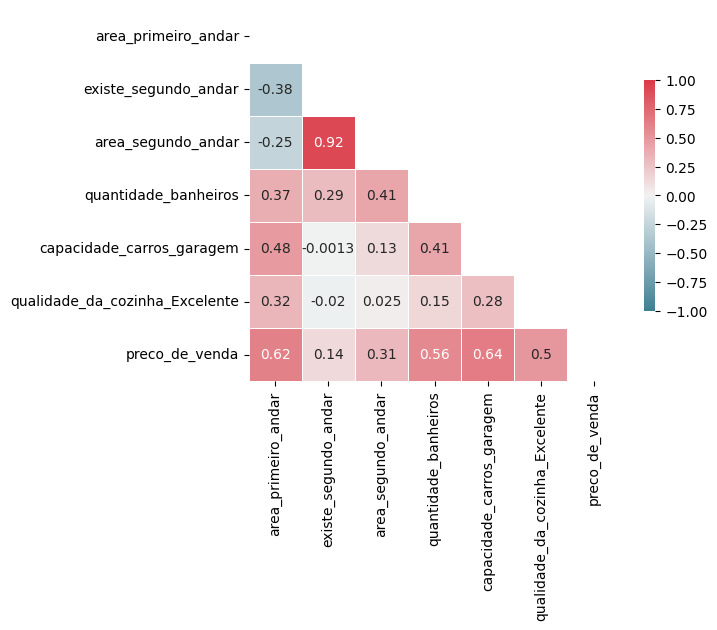

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Quais fatores estão mais correlacionados?

# Gerar uma máscara para o triângulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar a figura do matplotlib
f, ax = plt.subplots(figsize=(6, 6))

# Gerar o mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Exibir o mapa de calor (heatmap)
plt.show()

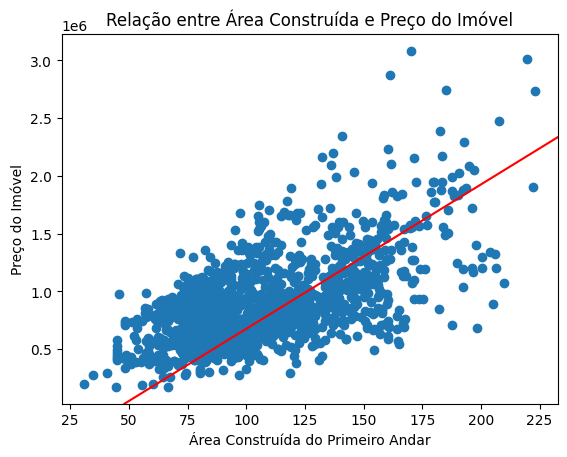

In [8]:
# Como é a relação entre a área construida e o preço do imóvel ?
plt.scatter(data['area_primeiro_andar'], data['preco_de_venda'])
plt.axline(xy1=(66, 250000), xy2=(190, 1800000), color='red')

plt.xlabel('Área Construída do Primeiro Andar')
plt.ylabel('Preço do Imóvel')
plt.title('Relação entre Área Construída e Preço do Imóvel')

plt.show()

In [9]:
import plotly.express as px

# Melhor reta
px.scatter(data, x ='area_primeiro_andar', y='preco_de_venda', trendline_color_override='red', trendline='ols')

plt.show()

# **2. Separando em treino e teste**

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
#import ols
from statsmodels.formula.api import ols

In [12]:
# Definindo X e y
y = data['preco_de_venda']
X = data.drop(columns=['preco_de_venda'])

# Aplicando o split do y e X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dados de treino para usar a fórmula
df_train = pd.DataFrame(data= X_train)
df_train['preco_de_venda'] = y_train

# Ajustando o primeiro modelo
modelo_0 = ols('preco_de_venda ~ area_primeiro_andar', data = df_train).fit()

# **2.1 Analisando os coeficientes**

In [13]:
# Vizualizando os parâmetros

modelo_0.params

,0
Intercept,145397.302896
area_primeiro_andar,6905.925181


In [14]:
# Resumo do nosso modelo
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     573.7
Date:                Tue, 11 Feb 2025   Prob (F-statistic):          1.21e-100
Time:                        06:38:46   Log-Likelihood:                -14117.
No. Observations:                1006   AIC:                         2.824e+04
Df Residuals:                    1004   BIC:                         2.825e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.454e+05   3

In [15]:
# R²
modelo_0.rsquared

# 36% do aumento do preço

0.3636291993675236

O coeficiente R², também conhecido como coeficiente de determinação, retornou 0.36. Podemos interpretar isso como 36% da variação nos preços das casas sendo explicada pelo tamanho do primeiro andar. Isso representa uma quantidade significativa de explicação, mas há mais a ser analisado.

Quanto mais próximo de 1 o valor de R², melhor é a explicabilidade do modelo. Então, apesar de termos 36% de explicação com apenas uma variável, é importante compreender que outros fatores podem influenciar os preços das casas.

# **2.2 Analisando os resíduos**

In [16]:
modelo_0.resid

,0
590,531581.741699
561,-108105.531128
156,686669.909313
573,481039.253654
596,-63260.170212
...,...
1095,-129005.235833
1130,63947.120080
1294,-166926.608873
860,-160627.670212


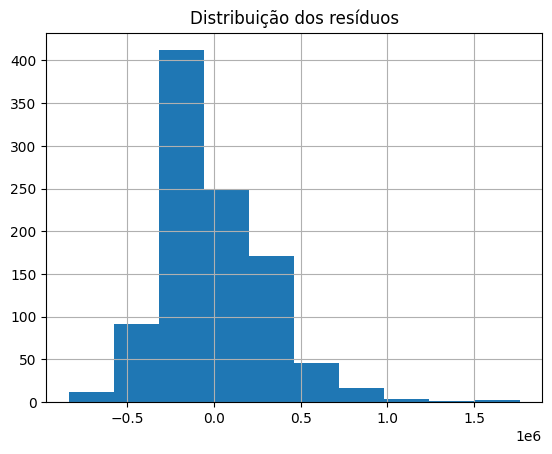

In [17]:
modelo_0.resid.hist()
plt.title("Distribuição dos resíduos")
plt.show()

# **2.3 R² para previsão**

In [18]:
y_predict = modelo_0.predict(X_test)

In [19]:
from sklearn.metrics import r2_score

In [20]:
print("R²: ", r2_score(y_test, y_predict))

R²:  0.42432168432534445


Quando examinamos o R² entre os conjuntos y_test e y_predito - isto é, entre os valores observados e os valores previstos pelo modelo - esperamos que esse número seja similar ao R² obtido durante o treinamento.

Ao voltarmos e verificarmos o R² do treinamento, que foi de 0.36, notamos que os valores de 0.36 e 0.42 estão bastante próximos. Isso sugere que o modelo está se comportando de maneira consistente tanto nos dados de treinamento quanto nos dados de teste.

É fundamental lembrar que esse valor representa a proporção da variação nos preços das casas explicada pela área do primeiro andar.

# **3. Adicionando outras características**

O modelo com apenas um fator nos mostrou um R² de 0.36, ou seja, aproximadamente 36% da variação observada nos preços das casas pode ser explicada pela variação na área.

Isso indica que ainda há uma quantidade significativa de variação que não está sendo capturada por esse modelo específico.Vamos analisar outros fatores para explicar o preço das casas.

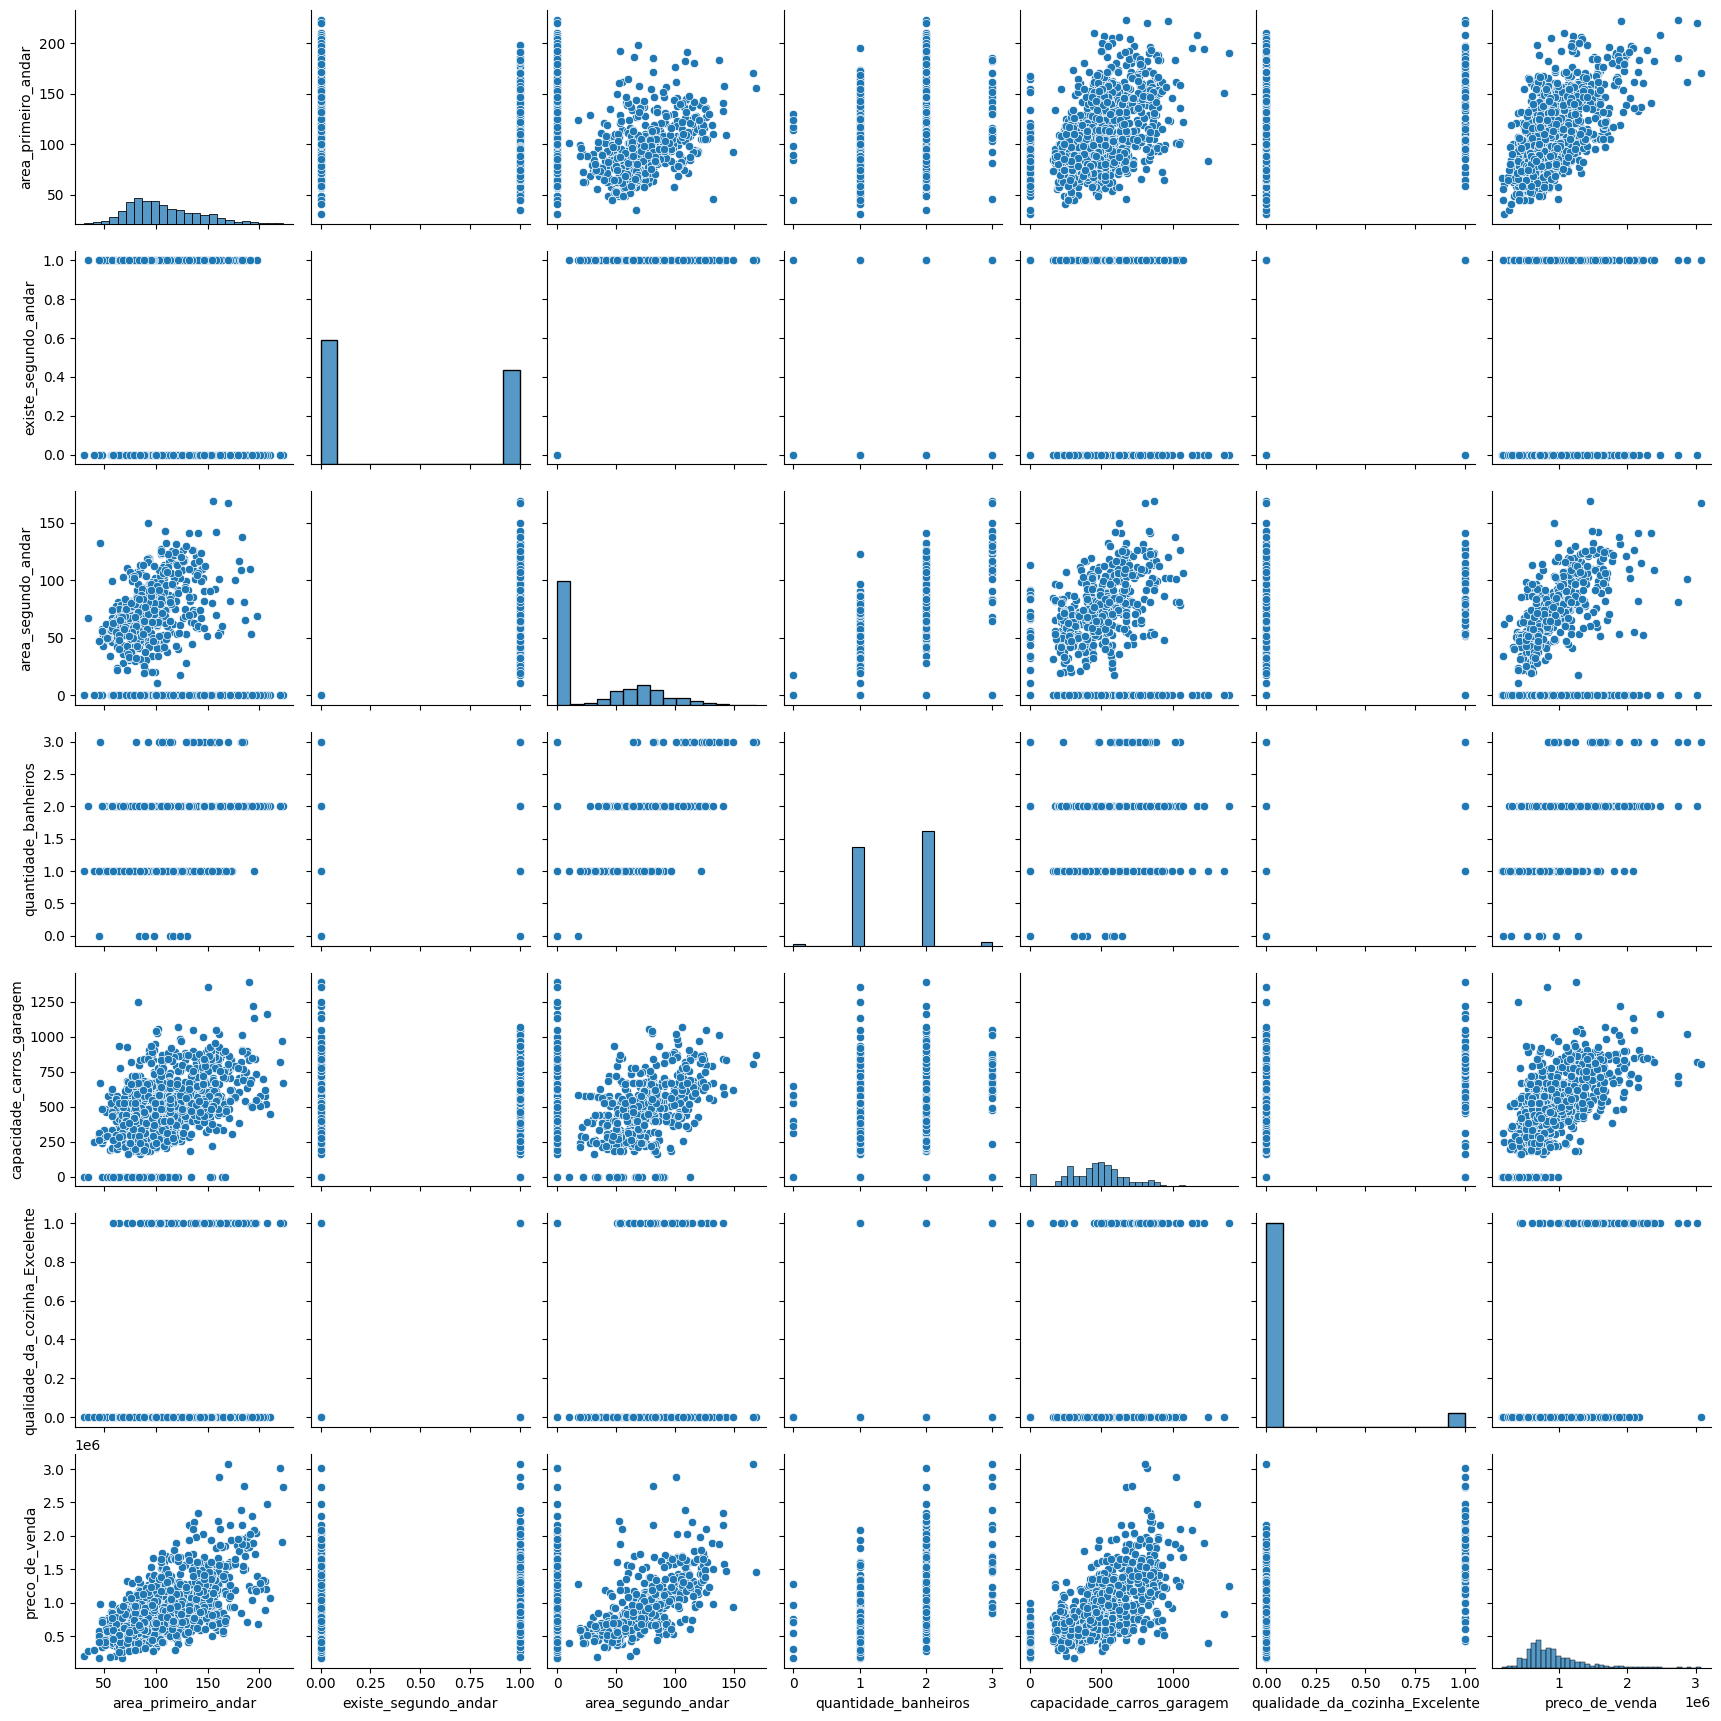

In [24]:
# Quais outras caracteristiscas influenciam o preço de imóveis ?
sns.pairplot(data)

In [25]:
data.columns

Index(['area_primeiro_andar', 'existe_segundo_andar', 'area_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente', 'preco_de_venda'],
      dtype='object')

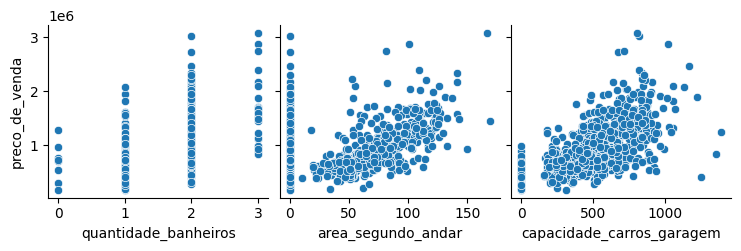

In [29]:
sns.pairplot(data, y_vars='preco_de_venda', x_vars=['quantidade_banheiros', 'area_segundo_andar', 'capacidade_carros_garagem'])

# **4. Adicionando fatores no modelo**

In [30]:
import statsmodels.api as sm

In [31]:
X_train = sm.add_constant(X_train)

In [33]:
X_train.columns

Index(['const', 'area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente'],
      dtype='object')

In [35]:
# Criando o modelo de regressão (sem fómula): saturado
modelo_1 = sm.OLS(y_train,
                  X_train[['const','area_primeiro_andar','existe_segundo_andar',
                          'area_segundo_andar','quantidade_banheiros','capacidade_carros_garagem',
                           'qualidade_da_cozinha_Excelente']]).fit()

In [37]:
# Modelo sem a área do segundo andar
modelo_2 = sm.OLS(y_train,
                  X_train[['const','area_primeiro_andar','existe_segundo_andar',
                          'quantidade_banheiros','capacidade_carros_garagem',
                           'qualidade_da_cozinha_Excelente']]).fit()

In [38]:
# Modelo sem informações sobre garagem
modelo_3 = sm.OLS(y_train,
                  X_train[['const','area_primeiro_andar','existe_segundo_andar',
                          'quantidade_banheiros',
                           'qualidade_da_cozinha_Excelente']]).fit()

In [39]:
print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     538.8
Date:                Tue, 11 Feb 2025   Prob (F-statistic):          5.16e-309
Time:                        06:56:33   Log-Likelihood:                -13619.
No. Observations:                1006   AIC:                         2.725e+04
Df Residuals:                     999   BIC:                         2.729e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [40]:
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     554.0
Date:                Tue, 11 Feb 2025   Prob (F-statistic):          3.59e-285
Time:                        06:56:50   Log-Likelihood:                -13677.
No. Observations:                1006   AIC:                         2.737e+04
Df Residuals:                    1000   BIC:                         2.740e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [41]:
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     493.7
Date:                Tue, 11 Feb 2025   Prob (F-statistic):          5.18e-235
Time:                        06:57:04   Log-Likelihood:                -13797.
No. Observations:                1006   AIC:                         2.760e+04
Df Residuals:                    1001   BIC:                         2.763e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [42]:
# Qual o melhor modelo ?
print('R²')
print('Modelo 0: ', modelo_0.rsquared)
print('Modelo 1: ', modelo_1.rsquared)
print('Modelo 2: ', modelo_2.rsquared)
print('Modelo 3: ', modelo_3.rsquared)


R²
Modelo 0:  0.3636291993675236
Modelo 1:  0.7639149214486479
Modelo 2:  0.7347484696298162
Modelo 3:  0.6636001317959367


In [43]:
# Quantos parâmetros estão nos modelos
print('Modelo 0: ', len(modelo_0.params))
print('Modelo 1: ', len(modelo_1.params))
print('Modelo 2: ', len(modelo_2.params))
print('Modelo 3: ', len(modelo_3.params))

Modelo 0:  2
Modelo 1:  7
Modelo 2:  6
Modelo 3:  5


In [44]:
modelo_3.params

,0
const,-139909.383257
area_primeiro_andar,5897.166849
existe_segundo_andar,216194.654924
quantidade_banheiros,172321.426027
qualidade_da_cozinha_Excelente,477782.406477


A escolha do terceiro modelo, mesmo com um R² menor (0.664) em comparação com os outros dois (0.764 e 0.735), é justificada por diversos fatores estatísticos e interpretativos que vão além da simples maximização do R². Algumas justificativas para essa decisão incluem:


**1. Menos Overfitting e Maior Generalização:**

O primeiro e o segundo modelos possuem um  R² maior, mas isso pode indicar que estão se ajustando excessivamente aos dados de treinamento, capturando ruídos em vez de padrões reais.
O terceiro modelo, com um R² mais baixo, pode ser mais robusto e generalizável para novos dados.


**2. Menor Complexidade e Melhor Interpretabilidade:**

O terceiro modelo tem menos variáveis (4 preditores) do que os outros dois modelos (6 e 5 preditores, respectivamente).
Modelos mais simples são geralmente preferidos quando não há um ganho expressivo no desempenho ao adicionar mais variáveis, pois reduzem a chance de multicolinearidade e melhoram a interpretabilidade.



**3. Redução de Multicolinearidade:**

O primeiro modelo tem um número de condição (condition number) de 3380, e o segundo tem 2660, indicando forte multicolinearidade.
O terceiro modelo tem um número de condição 559, muito menor, o que significa que as variáveis explicativas não estão tão correlacionadas entre si, tornando as estimativas mais confiáveis.


# **5. Precificando duas casa**



In [49]:
# R² da previsão
X_test.columns

Index(['const', 'area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente'],
      dtype='object')

In [47]:
modelo_3.params

,0
const,-139909.383257
area_primeiro_andar,5897.166849
existe_segundo_andar,216194.654924
quantidade_banheiros,172321.426027
qualidade_da_cozinha_Excelente,477782.406477


In [48]:
# Adicionando uma constante em X_test
X_test = sm.add_constant(X_test)

In [54]:
# Prevendo o modelo 3
predict_3 = modelo_3.predict(X_test[['const', 'area_primeiro_andar', 'existe_segundo_andar',
                        'quantidade_banheiros', 'qualidade_da_cozinha_Excelente']])

In [51]:
# Qual o R² da previsão ?
modelo_3.rsquared

0.6636001317959367

In [55]:
# Qual o R² do treino ?
print('R²: ', r2_score(y_test, predict_3))

R²:  0.6058436853884375


In [56]:
# Novo imóvel 1
novo_imovel = pd.DataFrame({
    'const': [1],
    'area_primeiro_andar': [120],
    'existe_segundo_andar': [1],
    'quantidade_banheiros': [2],
    'qualidade_da_cozinha_Excelente': [0]
})

In [75]:
# Novo imóvel 2
novo_imovel_2 = pd.DataFrame({
    'const': [1],
    'area_primeiro_andar': [98],
    'existe_segundo_andar': [0],
    'quantidade_banheiros': [1],
    'qualidade_da_cozinha_Excelente': [1]
})

In [61]:
# Preço do novo imóvel 1 no modelo 3
print(modelo_3.predict(novo_imovel)[0])

1128588.1455879528


In [76]:
# Preoço do novo imóvel 2 no modelo 3
print(modelo_3.predict(novo_imovel_2)[0])

1088116.8004385168


# **5.1 Precificando várias casas**

In [64]:
novas_casas = pd.read_csv('/content/Preços_de_casas.csv', sep=',')
novas_casas.head()

,Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0
2,3,85.4680,1,80.4514,2,608,0,1101855.0
3,4,89.2769,1,70.2324,1,642,0,690200.0
4,5,106.3705,1,97.8237,2,836,0,1232500.0


In [65]:
novas_casas.drop(columns={'Id'}, inplace=True)
novas_casas.head()

,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,79.5224,1,79.3366,2,548,0,1027905.0
1,117.2398,0,0.0000,2,460,0,894795.0
2,85.4680,1,80.4514,2,608,0,1101855.0
3,89.2769,1,70.2324,1,642,0,690200.0
4,106.3705,1,97.8237,2,836,0,1232500.0


In [66]:
novas_casas = sm.add_constant(novas_casas)

In [67]:
novas_casas.head()

,const,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,1.0,79.5224,1,79.3366,2,548,0,1027905.0
1,1.0,117.2398,0,0.0000,2,460,0,894795.0
2,1.0,85.4680,1,80.4514,2,608,0,1101855.0
3,1.0,89.2769,1,70.2324,1,642,0,690200.0
4,1.0,106.3705,1,97.8237,2,836,0,1232500.0


In [74]:
# Seleciona apenas as colunas usadas no treinamento do DataFrame novas_casas
predict_cols = ['const', 'area_primeiro_andar', 'existe_segundo_andar', 'quantidade_banheiros', 'qualidade_da_cozinha_Excelente']
predictions = modelo_3.predict(novas_casas[predict_cols])

# Agora 'predictions' contém os preços previstos para as novas casas.
for i in range(len(predictions)):
  print(predictions[i])

889884.9847452047
896116.1307280544
924947.1799619826
775087.4727456234
1048212.7100209668
684692.7507023683
1132785.9484413043
1027394.5316110048
980827.5535887219
622443.0466524492
602172.7150427495
1718586.8741346733
532048.3246091941
1023216.5883888736
718864.083498588
500273.2101939892
582450.230233312
914742.9219369678
642713.3782621488
765978.908321133
1227656.1444514818
639426.2974605759
1188118.4752677814
613129.6510479926
613129.6510479926
1081288.3492166619
525474.1630060483
1138264.4164439258
908966.9231895545
317292.3789064305
604159.2710638321
705167.9134920341
880776.4203207142
963751.6032157697
1537704.7304833373
1213412.127644666
633399.9826576923
742969.3427101226
611486.1106472061
835852.9826992177
930082.632344308
759952.5935182493
516708.61420185387
546292.34141601
662435.8630715861
1642343.4693334084
1080238.140491642
1111967.7700313423
824143.3687137465
555605.7370204666
855918.4831289514
479455.03178402747
479455.03178402747
777483.6911266382
985415.1591707853
9

# **6. Investigando o modelo**

In [77]:
# Multicolinearidade
from statsmodels.stats.outliers_influence import variance_inflation_factor

explicativas_1 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente']

explicativas_2 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente']

explicativas_3 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'qualidade_da_cozinha_Excelente']

In [79]:
# VIF 1
vif_1 = pd.DataFrame()
vif_1["variavel"] = explicativas_1

vif_1["vif"] = [variance_inflation_factor(X_train[explicativas_1], i) for i in range(len(explicativas_1))]
vif_1

# VIF passou de 5.0 já é considerado multicolinear

,variavel,vif
0,const,20.849900
1,area_primeiro_andar,2.090987
2,existe_segundo_andar,7.861873
3,area_segundo_andar,8.069881
4,quantidade_banheiros,1.777582
5,capacidade_carros_garagem,1.513916
6,qualidade_da_cozinha_Excelente,1.167115


In [80]:
# VIF 3
vif_3 = pd.DataFrame()
vif_3["variavel"] = explicativas_3

vif_3["vif"] = [variance_inflation_factor(X_train[explicativas_3], i) for i in range(len(explicativas_3))]
vif_3

,variavel,vif
0,const,18.608749
1,area_primeiro_andar,1.882045
2,existe_segundo_andar,1.601518
3,quantidade_banheiros,1.566404
4,qualidade_da_cozinha_Excelente,1.146313


In [81]:
# Résiduos

# Prevendo os valores de treino X_train[explicativas_3]
y_previsto_train =  modelo_3.predict(X_train[explicativas_3])

In [82]:
fig = px.scatter(x=y_previsto_train, y=y_train,
                 title='Previsão X Real',
                 labels={'x':'Preço previsto','y':'Preço real'})
fig.show()

In [86]:
residuos = modelo_3.resid

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Preço da Casa - Previsão', ylabel='Resíduos'>

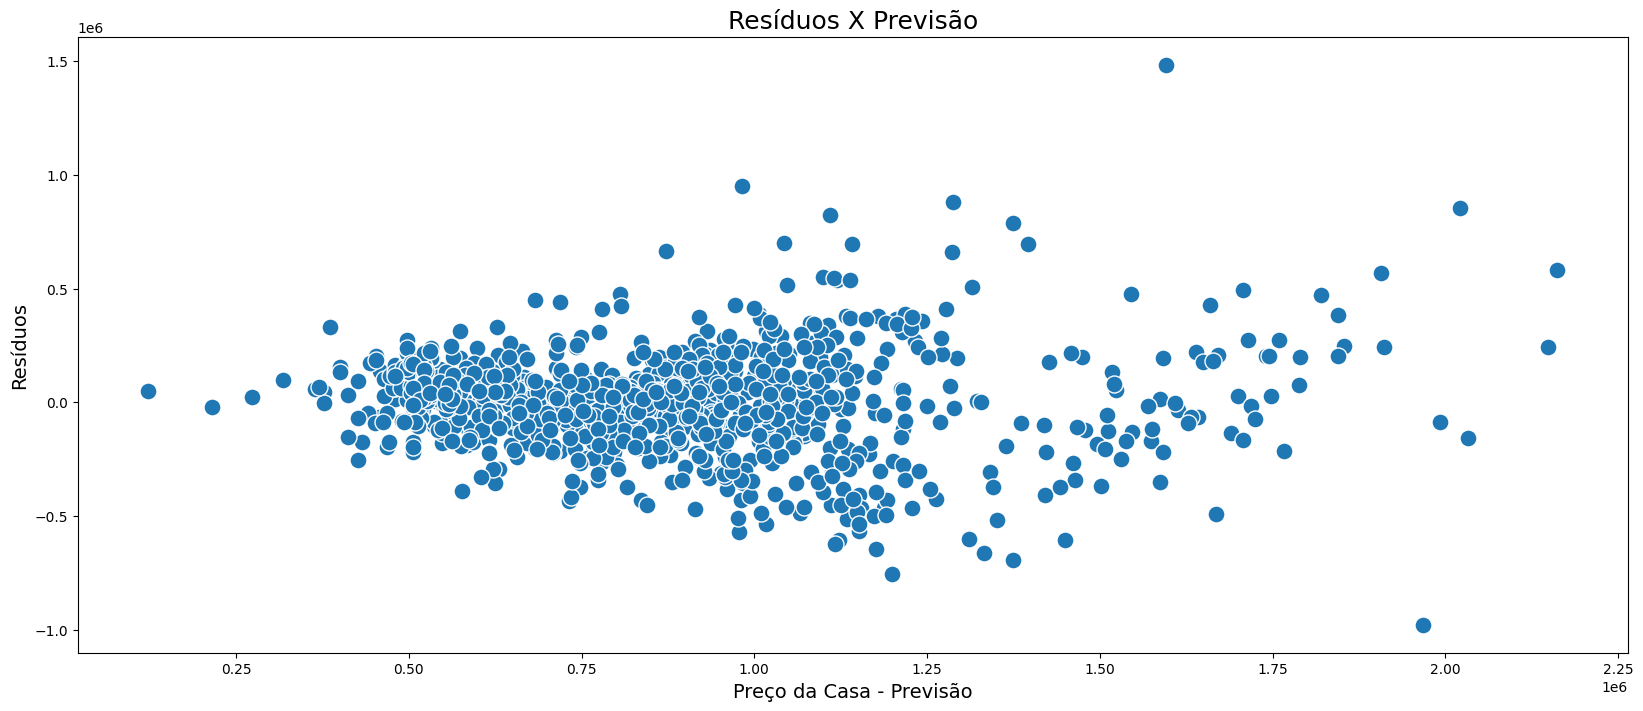

In [87]:
ax = sns.scatterplot(x=y_previsto_train, y=residuos, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Preço da Casa - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax